<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/LINDA_panel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intial power density:

**Current 300mA**

630nm LED = 3.52 W/m^2 at 10cm distance, 64deg half angle 

470nm LED = 4.5 W/m^2 at 10cm distance, 65deg angle

520nm LED = 2.4 W/m^2 at 10cm distance, 64deg angle

430nm LED - 4.98 W/m^2 at 10cm distance, 64deg angle

660nm LED - 3.74 W/m^2 at 10cm distance, 63deg angle

**Current 400mA**

430nm LED - 6.55 W/m^2 at 10cm distance, 64deg angle

660nm LED - 4.74 W/m^2 at 10cm distance, 63deg angle

**Current 450mA**

430nm LED - 7.17 W/m^2 at 10cm distance, 64deg angle

660nm LED - 5.54 W/m^2 at 10cm distance, 63deg angle




In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [2]:
#Ben's code
#Only use code in this cell if given the power density at a given height and need to find the initial intensity I [cd]
I_zero = 4.98 #Power Density in w/m^2 at a given height h from the LED
h = 0.10 #height from the LED to the plane given for Power density
I = I_zero*(h**2) #Intensity value in cd

In [3]:
#Ben's code
z = 0.15 #Distance from LED plane to target plane in metres
hA = 64 #LED half angle in degrees,,,,,,,,,,,, 63deg half angle is written in LED's datasheet 

#uniformity over 30cm*30cm plane
px = 0.30 #size of plane in x direction (m)
py = 0.30 #size of plane in y direction (m)
num = 100 #Number of points desired in each direction on the plane

#Comment out the next 3 lines and uncomment the line after that in order to use a given I value in cd
#omega = 2*np.pi #solid Angle
#fi = 1 #Flux in watts
#I = fi/omega
#I = 0.0000154 #Initial intensity in cd




In [4]:

############################## my part, calculating the LEDs positions#####################
#LEDs array coordinates
"""
Blue = B1(-7,7) 
Blue = B2(7,-7) 
Red = R1(7, 7) 
Red = R2(-7, -7) 
Green = G(0,0) 
"""

#saving LEDs positions to xlist and ylist for calculation
#xlist = [0, 0.007, 0.007, -0.007, -0.007 ]
#ylist = [0, -0.007, 0.007, 0.007, -0.007]
xlist = [0]
ylist = [0]


LED_n = 9 # number of tiles


# LEDs coordinates centered at (0,0)
#empty lists for saving LEDs coordinates
xlist_11 = [] # x coordinates for 1 unit
xlist_22 = [] # x coordinates for 2 unit
xlist_33 = [] # x coordinates for 3 unit
xlist_44 = [] # x coordinates for 4 unit
xlist_55 = [] # x coordinates for 5 unit
xlist_66 = [] # x coordinates for 6 unit
xlist_77 = [] # x coordinates for 7 unit
xlist_88 = [] # x coordinates for 8 unit
xlist_89 = []
ylist_11 = [] # y coordinates for 1 unit
ylist_22 = [] # y coordinates for 2 unit
ylist_33 = [] # y coordinates for 3 unit
ylist_44 = [] # y coordinates for 4 unit
ylist_55 = [] # y coordinates for 5 unit
ylist_66 = [] # y coordinates for 6 unit
ylist_77 = [] # y coordinates for 7 unit
ylist_88 = [] # y coordinates for 8 unit
ylist_89 = []

#below 
a= 0.15
b= 0.15
c = 0.15
for i in range(len(xlist)):
  xlist_11.append(xlist[i]+c)
  ylist_11.append(ylist[i]+a)

  xlist_22.append(xlist[i])
  ylist_22.append(ylist[i]+a)

  xlist_33.append(xlist[i]-c)
  ylist_33.append(ylist[i]+a)

  xlist_44.append(xlist[i]+b)
  ylist_44.append(ylist[i])

  xlist_55.append(xlist[i]-b)
  ylist_55.append(ylist[i])

  xlist_66.append(xlist[i]+c)
  ylist_66.append(ylist[i]-a)

  xlist_77.append(xlist[i])
  ylist_77.append(ylist[i]-a)

  xlist_88.append(xlist[i]-c)
  ylist_88.append(ylist[i]-a)

 
# save LEDs list to one list  which would be used for futher calculation
xlist.extend(xlist_11)
ylist.extend(ylist_11)

xlist.extend(xlist_22)
ylist.extend(ylist_22)

xlist.extend(xlist_44)
ylist.extend(ylist_44)

xlist.extend(xlist_33)
ylist.extend(ylist_33)

xlist.extend(xlist_55)
ylist.extend(ylist_55)

xlist.extend(xlist_66)
ylist.extend(ylist_66)

xlist.extend(xlist_77)
ylist.extend(ylist_77)

xlist.extend(xlist_88)
ylist.extend(ylist_88)

#xlist.extend(xlist_520)
#ylist.extend(ylist_520)


# deleting the (0,0) LED from list, commet this two lines if you work with LED positioned at (0, 0)
del xlist[0]
del ylist[0]

#printing the LEDs positions, just for checking is every positions calulated correctly
print(f"LEDs X coordinates (x1, x2, x3...) = {xlist}")
print(f"LEDs Y coordinates (y1, y2, y3...) = {ylist}")

#########################################
#Ben's code for calculating the E over the plane
#I made a little change, instade of 2 for loops is only one,but does the same job
################## target plane#######################
X = np.outer(1,np.linspace(-px/2,px/2,num)) #Position on plane in x direction
np.round(X,4)                         
Y = np.outer(np.linspace(-py/2,py/2,num),1) #Position on plane in y direction
np.round(Y,4)

x, y = np.meshgrid(X,Y) #This is required to enable the contour plot
##################
E = 0 #Set total illuminance to 0 initially
Enew = 0 #Set storage variable to zero initially to 0 initially
p = -(np.log(2)/np.log(np.cos(np.radians(hA))) )

for ledx,ledy in zip(xlist,ylist): #Outer loop to change the y position of the leds for each row of x positions
    Enew = E #Store the total illuminance from previous iteration
    opp = np.sqrt((x-ledx)**2+(y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
    hyp = np.sqrt(z**2 + opp**2) #Calculating the straight line distance from the LED to the point on the plane
    En = ((z**(p+1))*I ) / ((hyp**2)**((p+3)/2)) #Calculating illuminance of each LED for each point on the plane in W/m^2
    E = En + Enew #Adding illuminance from current iteration to total


M = np.max(E) #Peak of the matrix E
print(f"MAx power density in target plane: {np.max(E)}, W/m2")
print(f"Min power density in target plane: {np.min(E)}, W/m2")
print(f"Uniformity: {np.min(E)/np.max(E)}")
#E = E/M #Creating relative illuminance with respect to the peak of E

LEDs X coordinates (x1, x2, x3...) = [0.15, 0, 0.15, -0.15, -0.15, 0.15, 0, -0.15]
LEDs Y coordinates (y1, y2, y3...) = [0.15, 0.15, 0, 0.15, 0, -0.15, -0.15, -0.15]
MAx power density in target plane: 4.217652480595887, W/m2
Min power density in target plane: 3.413257219638905, W/m2
Uniformity: 0.8092789141215984


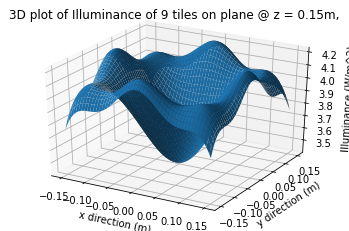

In [5]:
#Ben's code, changed only the set_title
#Code to create a 3D plot of 2D position on the plane and total illuminance
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x,y,E)
ax.set_title(f"3D plot of Illuminance of {LED_n} tiles on plane @ z = {z}m,")
ax.set_xlabel("x direction (m)")
ax.set_ylabel("y direction (m)")
ax.set_zlabel("Illuminance (W/m^2)")
#plt.plot(ledx,ledy,'rx')
#plt.contour(x,y,E)
#plt.colorbar(Mappable)
plt.show()

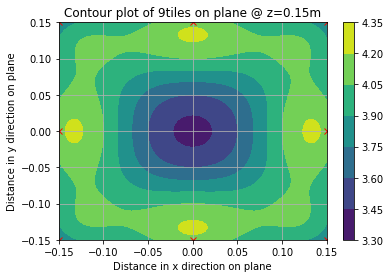

In [6]:
#Ben's code


fig,ax = plt.subplots(1,1)
#V = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1] #Line for putting specific contour lines in the plot
#V = [0.9, 0.93, 0.95, 0.98, 1]
V = [0.90*M,0.95*M, 0.98*M, M] #Array for making specific contour lines for illuminance in W/m^2
cp = ax.contourf(x,y,E)
#Code below for plotting each LED's position
"""
for j in ylist:
    ledy = -(n-j)*d/2 +py/2 
    for i in xlist:
        ledx = -(n-i)*d/2 +px/2
        plt.plot(ledx,ledy,'rx')
"""
for ledx, ledy in zip(xlist,ylist):
  plt.plot(ledx,ledy,'rx')


fig.colorbar(cp)
plt.title(f"Contour plot of {LED_n}tiles on plane @ z={z}m")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()